In [1]:
import ast
import matplotlib.pyplot as plt
import pandas as pd
from datasets import load_dataset
import seaborn as sns

In [2]:
my_dataset=load_dataset('lukebarousse/data_jobs')

In [3]:
df=my_dataset['train'].to_pandas()

In [4]:
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])

In [5]:
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [6]:
df_US=df[df['job_country']=='United States'].dropna(subset='salary_year_avg')

In [19]:
job_titles=df_US['job_title_short'].value_counts()

In [24]:
job_titles=job_titles.index[:6].to_list()

In [25]:
job_titles

['Data Scientist',
 'Data Analyst',
 'Data Engineer',
 'Senior Data Scientist',
 'Senior Data Engineer',
 'Senior Data Analyst']

In [28]:
df_US_top6=df_US[df_US['job_title_short'].isin(job_titles)]


In [32]:
job_order=df_US_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

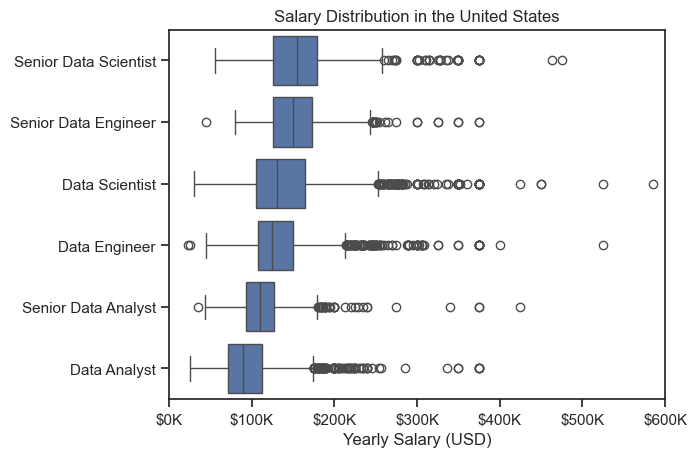

In [33]:
sns.boxplot(data=df_US_top6, x='salary_year_avg', y='job_title_short', order=job_order)
sns.set_theme(style='ticks')
plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
plt.xlim(0, 600000)
ticks_x=plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()